<a href="https://colab.research.google.com/github/craxer-ishan/Ai-ML/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Data Preparation
Loading the Data

• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image # Import Pillow
# Define dataset paths
train_dir = "/content/drive/MyDrive/Test"
test_dir = "/content/drive/MyDrive/Test"


In [ ]:
# Define image size
img_height, img_width = 28, 28

In [ ]:
def load_images_from_folder(folder):
    images = [] # Indented this line
    labels = [] # Indented this line
    class_names = sorted(os.listdir(folder)) # Sorted class names (digit_0, digit_1, ...) # Indented this line
    class_map = {name: i for i, name in enumerate(class_names)} # Map class names to labels # Indented this line
    for class_name in class_names: # Indented this line
        class_path = os.path.join(folder, class_name) # Indented this line
        label = class_map[class_name] # Indented this line
        for filename in os.listdir(class_path): # Indented this line
            img_path = os.path.join(class_path, filename) # Indented this line
            # Load image using PIL
            img = Image.open(img_path).convert("L") # Convert to grayscale # Indented this line
            img = img.resize((img_width, img_height)) # Resize to (28,28) # Indented this line
            img = np.array(img) / 255.0 # Normalize pixel values to [0,1] # Indented this line
            images.append(img) # Indented this line
            labels.append(label) # Indented this line
    return np.array(images), np.array(labels) # Indented this line

Training set: (770, 28, 28, 1), Labels: (770, 10)
Testing set: (770, 28, 28, 1), Labels: (770, 10)


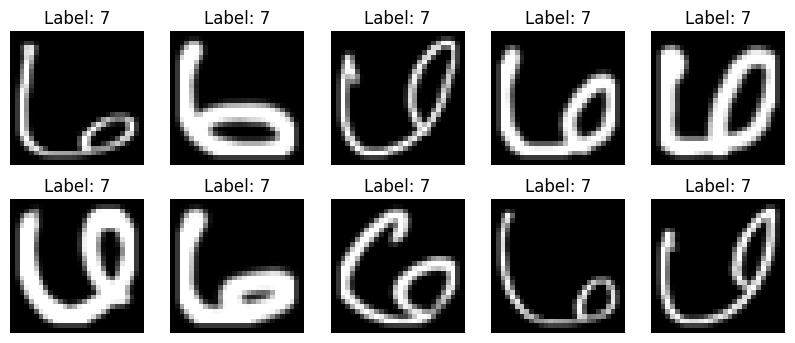

In [ ]:
# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)
# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1) # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)
# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")
# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
  plt.title(f"Label: {np.argmax(y_train[i])}")
  plt.axis("off")
plt.show()

#Task 2: Build the FCN Model

Model Architecture

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),  # Flatten the 28x28 image to 1D
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Summary of the model
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

#Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy), and evaluation metric (e.g., accuracy).

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Change loss function
    metrics=['accuracy']
)

#Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [ ]:
# Define batch size and number of epochs
batch_size = 128
epochs = 20

# Define callbacks
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
]

# Train the model
history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,  # 20% of training data used for validation
    callbacks=callbacks
)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.3339 - loss: 1.8505 - val_accuracy: 0.0000e+00 - val_loss: 2.0203
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4894 - loss: 1.1853 - val_accuracy: 0.0000e+00 - val_loss: 1.3805
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4823 - loss: 1.0674 - val_accuracy: 0.0000e+00 - val_loss: 1.2801
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4756 - loss: 1.0185 - val_accuracy: 0.0000e+00 - val_loss: 1.4175
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4690 - loss: 0.9868 - val_accuracy: 0.0000e+00 - val_loss: 1.4112
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5059 - loss: 0.9115 - val_accuracy: 0.0000e+00 - val_loss: 1.2924
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6143 - loss: 0.8503 - val_accuracy: 0.4026 - val_loss: 1.0920
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8421 - loss: 0.7620 - val_accuracy: 0.

#Task 5: Evaluate the Model

Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test accuracy and loss.

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9994 - loss: 0.0258
Test Loss: 0.0435
Test Accuracy: 0.9961


#Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [ ]:
from tensorflow.keras.models import load_model

# Save the model
model.save('devnagari_digit_classifier.h5')

# Load the model
loaded_model = load_model('devnagari_digit_classifier.h5')

# Re-evaluate
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(x_test, y_test)
print(f"Model Test Loss: {loaded_test_loss:.4f}")
print(f"Model Test Accuracy: {loaded_test_accuracy:.4f}")


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - loss: 0.0258  
Model Test Loss: 0.0435
Model Test Accuracy: 0.9961


#Task 7: Predictions

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

In [ ]:
#making predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
#display the sample Predictions
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"Actual label for first image: {np.argmax(y_test[0])}")

Predicted label for first image: 7
Actual label for first image: 7


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Sample 1:
Predicted Label: 7, True Label: 7
Sample 2:
Predicted Label: 7, True Label: 7
Sample 3:
Predicted Label: 7, True Label: 7
Sample 4:
Predicted Label: 7, True Label: 7
Sample 5:
Predicted Label: 7, True Label: 7
Sample 6:
Predicted Label: 7, True Label: 7
Sample 7:
Predicted Label: 7, True Label: 7
Sample 8:
Predicted Label: 7, True Label: 7
Sample 9:
Predicted Label: 7, True Label: 7
Sample 10:
Predicted Label: 7, True Label: 7


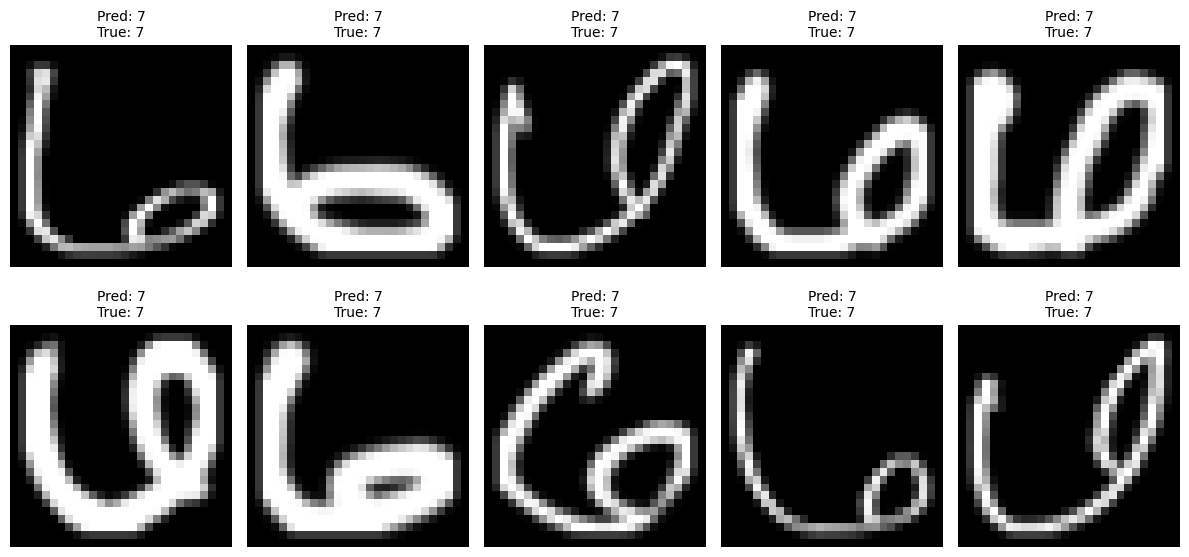

In [ ]:
import numpy as np

# Use the model to make predictions on the test set
predictions = model.predict(x_test)

# Convert predicted probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded true labels to digit labels
true_labels = np.argmax(y_test, axis=1)


for i in range(10):  # Display predictions for the first 10 test samples
    print(f"Sample {i + 1}:")
    print(f"Predicted Label: {predicted_labels[i]}, True Label: {true_labels[i]}")


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}", fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()